### LAB 6
### 2348045

### Explain how ANN can perform this with an ANN model.Discuss the difficulties involved in ANN for handwritten character recognition with Accuracy and loss.

### 1.Design and implement a handwritten character-recognition algorithm using CNN networks. 

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
train = pd.read_csv("train.csv")

# Separate features and labels
X = train.iloc[:, 1:].values.reshape(-1, 28, 28, 1)  # Reshape to 28x28 pixels and 1 channel
y = train.iloc[:, 0].values  # Labels

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Normalize the pixel values to the range [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9036 - loss: 0.3008 - val_accuracy: 0.9880 - val_loss: 0.0403
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9899 - loss: 0.0334 - val_accuracy: 0.9895 - val_loss: 0.0323
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9932 - loss: 0.0215 - val_accuracy: 0.9912 - val_loss: 0.0349
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9949 - loss: 0.0149 - val_accuracy: 0.9934 - val_loss: 0.0220
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9964 - loss: 0.0117 - val_accuracy: 0.9904 - val_loss: 0.0308
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9967 - loss: 0.0102 - val_accuracy: 0.9908 - val_loss: 0.0323
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9969 - loss: 0.0091 - val_accuracy: 0.9933 - val_loss: 0.0247
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9974 - 

In [27]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {val_acc:.4f}')

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9933 - loss: 0.0267
Validation accuracy: 0.9923


In [28]:
model.save('kannada_digits_cnn_model.h5')

In [29]:
predictions = model.predict(X_val)
predicted_labels = predictions.argmax(axis=1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [30]:
import pandas as pd
from sklearn.metrics import classification_report

y_pred = model.predict(X_val)
y_pred_classes = y_pred.argmax(axis=1)

report = classification_report(y_val, y_pred_classes, output_dict=True)

report_df = pd.DataFrame(report).transpose()

print(report_df)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score       support
0              0.976608  0.993203  0.984836   1177.000000
1              0.992506  0.978654  0.985531   1218.000000
2              1.000000  0.998366  0.999182   1224.000000
3              0.994889  0.986486  0.990670   1184.000000
4              0.998357  0.995086  0.996719   1221.000000
5              0.993300  0.998316  0.995802   1188.000000
6              0.979832  0.997434  0.988554   1169.000000
7              0.989327  0.988515  0.988921   1219.000000
8              1.000000  0.998314  0.999156   1186.000000
9              0.998337  0.989292  0.993794   1214.000000
accuracy       0.992333  0.992333  0.992333      0.992333
macro avg      0.992316  0.992367  0.992317  12000.000000
weighted avg   0.992393  0.992333  0.992339  12000.000000


Precision:
Precision is the ratio of correctly predicted positive observations to the total predicted positives. It indicates how accurate the positive predictions are.
Example from Report:
For digit 0, the precision is 0.976608, meaning that out of all predictions made for digit 0, approximately 97.66% were correct.
Recall (Sensitivity):
Recall is the ratio of correctly predicted positive observations to all observations in the actual class. It shows how well the model captures all relevant cases.
Example from Report:
For digit 4, the recall is 0.995086, meaning that the model correctly identified about 99.51% of all actual instances of digit 4.
F1-Score:
The F1-score is the weighted average of precision and recall. It balances the trade-off between precision and recall and is particularly useful when you need to account for both false positives and false negatives.
Example from Report:
For digit 2, the F1-score is 0.999182, indicating an excellent balance between precision and recall for this digit.
Support:
 Support is the number of actual occurrences of each class in the dataset. It helps to understand how many instances were there for each digit.
Example from Report:
The support for digit 5 is 1188, meaning that there are 1188 instances of digit 5 in the validation dataset.
Summary Metrics:
Accuracy:
 Accuracy is the overall proportion of correctly predicted observations out of the total observations.
Value in Report: The model achieved an accuracy of 0.992333, indicating that about 99.23% of all predictions were correct.
Macro Average:
The macro average calculates the mean of precision, recall, and F1-score for all classes without considering the support. It treats all classes equally.
Value in Report: The macro average precision is 0.992316, recall is 0.992367, and F1-score is 0.992317. These values suggest that the model performs consistently well across all classes.
Weighted Average:
The weighted average takes the support of each class into account when calculating the mean of precision, recall, and F1-score. It gives more importance to classes with more samples.
Value in Report: The weighted average precision is 0.992393, recall is 0.992333, and F1-score is 0.992339. These values indicate that the model performs well overall, with slight adjustments based on the distribution of the classes.
Interpretation:
The CNN model performs exceptionally well across all Kannada digits, with high precision, recall, and F1-scores close to 1. This indicates that the model is making very few mistakes.
The accuracy of 99.23% is impressive, showing that the model is robust and reliable for the task.
The model maintains high performance across all classes, as indicated by both the macro and weighted averages.

#### ANN

In [31]:
# Load the dataset
train = pd.read_csv("train.csv")

# Separate features and labels
X = train.iloc[:, 1:].values
y = train.iloc[:, 0].values 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalize the pixel values to the range [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0

In [32]:
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


C:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9247 - loss: 0.2629 - val_accuracy: 0.9785 - val_loss: 0.0720
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9844 - loss: 0.0492 - val_accuracy: 0.9821 - val_loss: 0.0612
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9908 - loss: 0.0299 - val_accuracy: 0.9858 - val_loss: 0.0519
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9926 - loss: 0.0257 - val_accuracy: 0.9858 - val_loss: 0.0578
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9945 - loss: 0.0176 - val_accuracy: 0.9867 - val_loss: 0.0600
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9957 - loss: 0.0130 - val_accuracy: 0.9882 - val_loss: 0.0557
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9962 - loss: 0.0136 - val_accuracy: 0.9855 - val_loss: 0.0628
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9976 - loss: 0.

In [34]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9978 - loss: 0.0069 - val_accuracy: 0.9862 - val_loss: 0.0807
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9976 - loss: 0.0086 - val_accuracy: 0.9871 - val_loss: 0.0698
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9983 - loss: 0.0066 - val_accuracy: 0.9861 - val_loss: 0.0852
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9981 - loss: 0.0068 - val_accuracy: 0.9879 - val_loss: 0.0749
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9984 - loss: 0.0070 - val_accuracy: 0.9867 - val_loss: 0.1041
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9982 - loss: 0.0078 - val_accuracy: 0.9854 - val_loss: 0.0779
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9984 - loss: 0.0060 - val_accuracy: 0.9887 - val_loss: 0.0867
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9994 - loss: 0.0023

In [35]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {val_acc:.4f}')

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9878 - loss: 0.0882
Validation accuracy: 0.9876


##### Classification report

In [36]:
import pandas as pd
from sklearn.metrics import classification_report

y_pred = model.predict(X_val)
y_pred_classes = y_pred.argmax(axis=1)

report = classification_report(y_val, y_pred_classes, output_dict=True)

report_df = pd.DataFrame(report).transpose()

print(report_df)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score       support
0              0.993121  0.981308  0.987179   1177.000000
1              0.980630  0.997537  0.989011   1218.000000
2              0.997553  0.999183  0.998367   1224.000000
3              0.987267  0.982264  0.984759   1184.000000
4              0.995861  0.985258  0.990531   1221.000000
5              0.990741  0.990741  0.990741   1188.000000
6              0.961826  0.991446  0.976411   1169.000000
7              0.980913  0.969647  0.975248   1219.000000
8              0.995770  0.992411  0.994088   1186.000000
9              0.992537  0.985997  0.989256   1214.000000
accuracy       0.987583  0.987583  0.987583      0.987583
macro avg      0.987622  0.987579  0.987559  12000.000000
weighted avg   0.987685  0.987583  0.987593  12000.000000


In [38]:
### Classification Report for ANN:

1. **Precision**: The ratio of correctly predicted positive observations to the total predicted positives. It indicates how accurate the positive predictions are.

2. **Recall**: The ratio of correctly predicted positive observations to all observations in the actual class. It indicates how well the model captures all positive instances.

3. **F1-Score**: The weighted average of Precision and Recall. It balances the precision and recall and is useful when there is an uneven class distribution.

4. **Support**: The number of actual occurrences of the class in the dataset. It indicates how many instances belong to each class.

5. **Accuracy**: The overall percentage of correctly classified instances across all classes.

6. **Macro Avg**: The average of Precision, Recall, and F1-Score calculated independently for each class without considering class imbalance.

7. **Weighted Avg**: The average of Precision, Recall, and F1-Score considering the support (the number of true instances) of each class, providing a more balanced overview when there is class imbalance.

SyntaxError: invalid syntax (1037633538.py, line 3)

C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9017 - loss: 0.3151 - val_accuracy: 0.9822 - val_loss: 0.0594
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9848 - loss: 0.0473 - val_accuracy: 0.9870 - val_loss: 0.0436
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9900 - loss: 0.0303 - val_accuracy: 0.9892 - val_loss: 0.0350
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9926 - loss: 0.0226 - val_accuracy: 0.9892 - val_loss: 0.0367
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9943 - loss: 0.0162 - val_accuracy: 0.9913 - val_loss: 0.0304
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9964 - loss: 0.0109 - val_accuracy: 0.9923 - val_loss: 0.0329
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9975 - loss: 0.0077 - val_accuracy: 0.9865 - val_loss: 0.0674
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9973 -

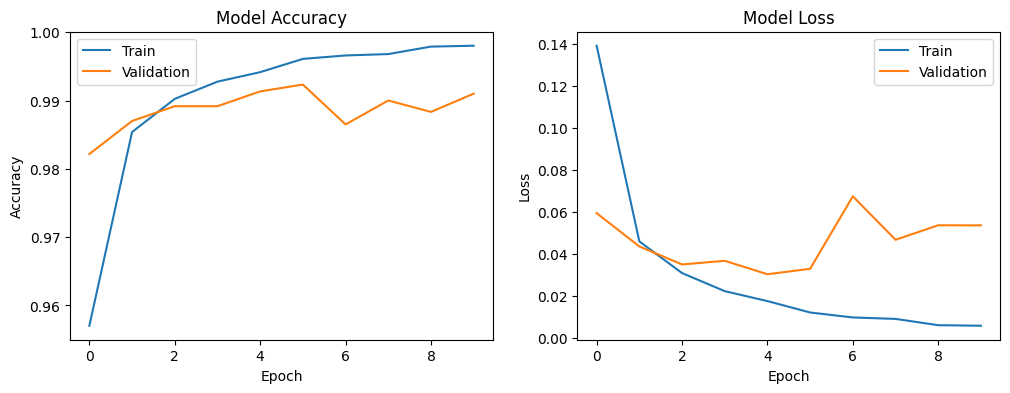

In [37]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data to fit the model: (n_samples, height, width, n_channels)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Generate classification report
report = classification_report(y_test, y_pred_classes)
print(report)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### From the grpah we can understand that your model is improving its accuracy on both training and validation data over time, while the loss is decreasing.

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8672 - loss: 0.4551 - val_accuracy: 0.9663 - val_loss: 0.1166
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9649 - loss: 0.1159 - val_accuracy: 0.9707 - val_loss: 0.0907
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9772 - loss: 0.0739 - val_accuracy: 0.9748 - val_loss: 0.0829
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9840 - loss: 0.0499 - val_accuracy: 0.9768 - val_loss: 0.0782
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9868 - loss: 0.0409 - val_accuracy: 0.9767 - val_loss: 0.0756
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9909 - loss: 0.0302 - val_accuracy: 0.9735 - val_loss: 0.1006
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9908 - loss: 0.0268 - val_accuracy: 0.9782 - val_loss: 0.0855
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9921 - loss: 0.0237 - 

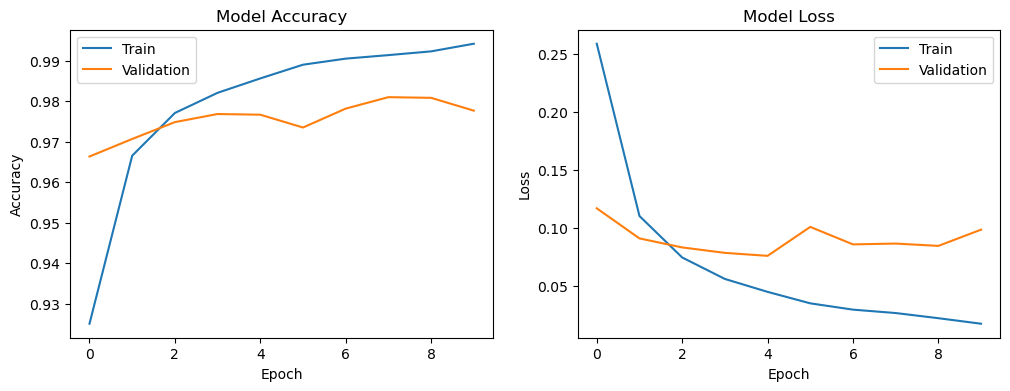

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten the images: convert each 28x28 image into a 784-element vector
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

# Build the ANN model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Generate classification report
report = classification_report(y_test, y_pred_classes)
print(report)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Model is improving its accuracy on both training and validation data over time, while the loss is decreasing

In [14]:
pip install numpy opencv-python dlib face_recognition


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/ec/6c/fab8113424af5049f85717e8e527ca3773299a3c6b02506e66436e19874f/opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached dlib-19.24.6.tar.gz (3.4 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for face_recognition from https://files.pythonhosted.org/packages/1e/95/f6c9330f54ab07bfa032bf3715c12455a381083125d8880c43cbe76bb3d0/face_recognition-1.3.0-py2.py3-none-any.whl.metadata
  Using cached face_recognition-1.3.0-py2.py3-none-any.whl.metadata (21 kB)
  Using cached face_recognition_models-0.3.0-py2.py3-none-any.whl
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
  Running setup.py clean for dlib
Failed to build dli

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [41 lines of output]
  running bdist_wheel
  running build
  running build_ext
  
  
                     CMake is not installed on your system!
  
      Or it is possible some broken copy of cmake is installed on your system.
      It is unfortunately very common for python package managers to include
      broken copies of cmake.  So if the error above this refers to some file
      path to a cmake file inside a python or anaconda or miniconda path then you
      should delete that broken copy of cmake from your computer.
  
      Instead, please get an official copy of cmake from one of these known good
      sources of an official cmake:
          - cmake.org (this is how windows users should get cmake)
          - apt install cmake (for Ubuntu or Debian based systems)
          - yum install cmake (for Redhat or CenOS based systems)
  
      On a linux machine you c

In [1]:
import cv2
import os
import numpy as np
from tkinter import Tk, filedialog

# Function to upload images from a folder
def upload_images():
    Tk().withdraw()  # Prevents the Tkinter window from appearing
    folder_selected = filedialog.askdirectory(title='Select a folder with images for the dataset')
    if folder_selected:
        image_files = [os.path.join(folder_selected, f) for f in os.listdir(folder_selected)
                       if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        return image_files
    else:
        return []

# Function to create a dataset of images and extract features
def create_dataset(image_paths):
    face_recognizer = cv2.face.LBPHFaceRecognizer_create()
    faces = []
    labels = []
    label_map = {}

    for i, image_path in enumerate(image_paths):
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        faces_rect = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

        for (x, y, w, h) in faces_rect:
            face = gray[y:y + h, x:x + w]
            faces.append(face)
            labels.append(i)
            label_map[i] = os.path.basename(image_path)

    face_recognizer.train(faces, np.array(labels))
    return face_recognizer, label_map

# Function to identify faces in a live camera feed
def recognize_faces_in_camera(face_recognizer, label_map):
    video_capture = cv2.VideoCapture(0)  # Open the webcam
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    while True:
        ret, frame = video_capture.read()  # Capture frame-by-frame
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        faces_rect = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

        for (x, y, w, h) in faces_rect:
            face = gray[y:y + h, x:x + w]
            label, confidence = face_recognizer.predict(face)
            name = label_map.get(label, "Unknown")

            # Draw a box around the face
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
            # Label the face with the name
            cv2.rectangle(frame, (x, y + h - 35), (x + w, y + h), (0, 0, 255), cv2.FILLED)
            font = cv2.FONT_HERSHEY_DUPLEX
            cv2.putText(frame, name, (x + 6, y + h - 6), font, 1.0, (255, 255, 255), 1)

        # Display the resulting frame
        cv2.imshow('Video', frame)

        # Hit 'q' on the keyboard to quit the program
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the webcam and close windows
    video_capture.release()
    cv2.destroyAllWindows()

# Main function to execute the script
def main():
    print("Please select a folder containing images for the dataset:")
    image_paths = upload_images()
    if not image_paths:
        print("No images selected or folder is empty.")
        return

    dataset, label_map = create_dataset(image_paths)

    print("Starting real-time face recognition via webcam...")
    recognize_faces_in_camera(dataset, label_map)

if __name__ == "__main__":
    main()


Please select a folder containing images for the dataset:
Starting real-time face recognition via webcam...



KeyboardInterrupt



In [17]:
pip install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/ec/6c/fab8113424af5049f85717e8e527ca3773299a3c6b02506e66436e19874f/opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [22]:
!pip install opencv-contrib-python



  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/a7/9e/7110d2c5d543ab03b9581dbb1f8e2429863e44e0c9b4960b766f230c1279/opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/45.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.5 MB 660.6 kB/s eta 0:01:09
   ---------------------------------------- 0.0/45.5 MB 660.6 kB/s eta 0:01:09
   ---------------------------------------- 0.1/45.5 MB 901.1 kB/s eta 0:00:51
   ---------------------------------------- 0.1/45.5 MB 950.9 kB/s eta 0:00:48
   ---------------------------------------- 0.2/45.5 MB 986.4 kB/s eta 0:00:46
   ---------------------------------------- 0.3/45.5 MB 1.1 MB/s eta 0:00:44
   ---------------------------------------- 0.4/45.5 MB 1.2 MB/s eta 0:00:38
   ---------------------------------------- 0.4/45.5 MB 1.2 MB/s eta 0:00:39
   ---------------------------------------- 0.5/45.5 MB 1.1 MB/s e

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\User\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [24]:
pip install --user opencv-contrib-python


Note: you may need to restart the kernel to use updated packages.


In [30]:
import cv2
print(cv2.__version__)


4.10.0


In [31]:
import cv2
if hasattr(cv2, 'face'):
    print("cv2.face is available")
else:
    print("cv2.face is not available")


cv2.face is not available
